<a href="https://colab.research.google.com/github/trevorlillywhite/HW-4---NCSU-ST-554---Trevor-Lillywhite/blob/main/HW4_ST_554_Trevor_Lillywhite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 4 - ST 554

##### Author:   Trevor Lillywhite
##### Due Date: February 10, 2026



---


## Part 1 - Summarizing Student Data Graphically

### Task 0: Bring in Homework 3 Code

In [1]:
import pandas as pd
import numpy as np

#### Task 0.1: Read in the data

In [2]:
url = 'https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt'
df = pd.read_csv(url, delimiter=';')    # Read dataset from URL
df.head()                               # View first few observations

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Task 0.2: Summarize the Data

#### Categorical Variables

##### Create a one-way contingency table

In [3]:
pd.crosstab(index=df['famsize'], columns='counts')

col_0,counts
famsize,
GT3,281
LE3,114


_Interpretation of one-way contingency table:_

The famsize feature describes the size of the student's family. A response of "GT3" means the student has greater than three members of the family, and a response of "LE3" means the student has less than or equal to three members in their family.

The value of 281 for GT3 means that 281 of the students had a family size of greater than 3 family members.

##### Create a two-way contingency table

In [4]:
pd.crosstab(df['famsize'], df['address'])

address,R,U
famsize,,
GT3,68,213
LE3,20,94


_Interpretation of two-way contingency table:_

The first value (located at [0,0]) means that 68 students with a rural address ('R') had a family size greater than 3.

##### Create a three-way contingency table

In [5]:
pd.crosstab(index=df['famsize'],
            columns=[df['address'], df['traveltime']]
            )

address      R               U          
traveltime   1   2   3  4    1   2  3  4
famsize                                 
GT3         30  24  10  4  160  45  7  1
LE3          5  10   4  1   62  28  2  2

_Interpretation of three-way contingency table:_

The first value (located at the intersection of GT3, R, and 1) means that there are 30 students who live at a rural address ('R') with a travel time to school of <15 min (traveltime = 1) and a family size of greater than 3 family members.

##### Create a conditional two-way table.

First, by subsetting the data before creating the table:

In [6]:
df_largefam = df.loc[df['famsize'] == 'GT3']
pd.crosstab(df_largefam['traveltime'], df_largefam['address'])

address,R,U
traveltime,,
1,30,160
2,24,45
3,10,7
4,4,1


_Interpretation:_  

The results are the same as the three-way contingency table from above, but with the first dimension (famsize) collapsed. Here, we see there are 30 students with a rural address and a <15 min travel time (following the condition that all of the students considered have a family size greater than 3 members).

Second, by creating a three-way table and subsetting it:

In [7]:
contingency_threeway = pd.crosstab(index=df['famsize'],
            columns=[df['address'], df['traveltime']]
            )
contingency_threeway.iloc[0,:]

address  traveltime
R        1              30
         2              24
         3              10
         4               4
U        1             160
         2              45
         3               7
         4               1
Name: GT3, dtype: int64

_Interpretation:_  

Although the table is structured differently, we can clearly see the same results as before. For example, on the condition that family sizes are greater than 3, there were 30 students in rural areas with travel time code of 1 (<15 min travel time).

#### Numeric Variables

##### Find measures of center and spread for three variables (including G3)

In [8]:
list_var = ['absences',
            'G1',
            'G3']       # Define three variables of interest
df[list_var].mean()     # Find mean (measure of center)

,0
absences,5.708861
G1,10.908861
G3,10.415190


In [9]:
df[list_var].median()   # Find median (measure of center)

,0
absences,4.0
G1,11.0
G3,11.0


In [10]:
df[list_var].var()      # Find variance (measure of spread)

,0
absences,64.049541
G1,11.017053
G3,20.989616


In [11]:
df[list_var].std()      # Find standard deviation (measure of spread)

,0
absences,8.003096
G1,3.319195
G3,4.581443


In [12]:
df[list_var].quantile(q = [0, 0.25, 0.5, 0.75, 1.0])      # Find quantiles (measures of spread)

,absences,G1,G3
0.00,0.0,3.0,0.0
0.25,0.0,8.0,8.0
0.50,4.0,11.0,11.0
0.75,8.0,13.0,14.0
1.00,75.0,19.0,20.0


Repeat while subsetting the data by some grouping variable (e.g., with `.loc`)

In [13]:
# Subset age >18 before calculating measures of center
df[list_var].loc[(df['age'] > 18)].mean()       # Find mean

,0
absences,9.827586
G1,10.448276
G3,8.758621


In [14]:
# Subset age >18 before calculating measures of center
df[list_var].loc[(df['age'] > 18)].median()       # Find median

,0
absences,5.0
G1,10.0
G3,9.0


In [15]:
# Subset age >18 before calculating measures of spread
df[list_var].loc[(df['age'] > 18)].var()    # Find variance

,0
absences,114.719212
G1,11.256158
G3,22.261084


In [16]:
# Subset age >18 before calculating measures of spread
df[list_var].loc[(df['age'] > 18)].std()    # Find standard deviation

,0
absences,10.710705
G1,3.355020
G3,4.718165


In [17]:
# Subset age >18 before calculating measures of spread
df[list_var].loc[(df['age'] > 18)].quantile(q = [0, 0.25, 0.5, 0.75, 1.0])
        # Find quantiles (specifically, quartiles)

,absences,G1,G3
0.00,0.0,5.0,0.0
0.25,2.0,8.0,8.0
0.50,5.0,10.0,9.0
0.75,15.0,13.0,11.0
1.00,40.0,17.0,18.0


##### Find measures of center and spread across a single grouping variable for three variables (including G3)

In [18]:
# Group by sex before calculating measures of center
df.groupby('sex')[list_var].mean()       # Find mean

,absences,G1,G3
sex,,,
F,6.216346,10.620192,9.966346
M,5.144385,11.229947,10.914439


In [19]:
# Group by sex before calculating measures of center
df.groupby('sex')[list_var].median()       # Find median

,absences,G1,G3
sex,,,
F,4.0,10.0,10.0
M,4.0,11.0,11.0


In [20]:
# Group by sex before calculating measures of spread
df.groupby('sex')[list_var].var()    # Find variance

,absences,G1,G3
sex,,,
F,89.223500,10.449252,21.366012
M,35.769363,11.511356,20.207694


In [21]:
# Group by sex before calculating measures of spread
df.groupby('sex')[list_var].std()    # Find standard deviation

,absences,G1,G3
sex,,,
F,9.445819,3.232530,4.622338
M,5.980749,3.392839,4.495297


In [22]:
# Group by sex before calculating measures of spread
df.groupby('sex')[list_var].quantile(q = [0, 0.25, 0.5, 0.75, 1.0])
        # Find quantiles (specifically, quartiles)

absences    G1    G3
sex                           
F   0.00       0.0   4.0   0.0
    0.25       0.0   8.0   8.0
    0.50       4.0  10.0  10.0
    0.75       8.0  13.0  13.0
    1.00      75.0  19.0  19.0
M   0.00       0.0   3.0   0.0
    0.25       0.0   9.0   9.0
    0.50       4.0  11.0  11.0
    0.75       8.0  14.0  14.0
    1.00      38.0  19.0  20.0

##### Find measures of center and spread across two grouping variables for three variables (including G3)

In [23]:
# Group by sex and parents' cohabitation status
    # before calculating measures of center
df.groupby(['sex', 'Pstatus'])[list_var].mean() # Find mean

absences         G1         G3
sex Pstatus                                
F   A        9.695652   9.826087   9.652174
    T        5.783784  10.718919  10.005405
M   A        7.833333  12.666667  13.166667
    T        4.857988  11.076923  10.674556

In [24]:
# Group by sex and parents' cohabitation status
    # before calculating measures of center
df.groupby(['sex', 'Pstatus'])[list_var].median() # Find median

absences    G1    G3
sex Pstatus                      
F   A             6.0  10.0  11.0
    T             4.0  10.0  10.0
M   A             6.0  12.0  12.0
    T             3.0  11.0  11.0

In [25]:
# Group by sex and parents' cohabitation status
    # before calculating measures of spread
df.groupby(['sex', 'Pstatus'])[list_var].var() # Find variance

absences         G1         G3
sex Pstatus                                  
F   A        238.584980   8.150198  15.600791
    T         70.148649  10.692303  22.157579
M   A         67.794118  11.647059  15.794118
    T         31.884474  11.321429  20.173218

In [26]:
# Group by sex and parents' cohabitation status
    # before calculating measures of spread
df.groupby(['sex', 'Pstatus'])[list_var].std() # Find standard deviation

absences        G1        G3
sex Pstatus                               
F   A        15.446196  2.854855  3.949784
    T         8.375479  3.269909  4.707184
M   A         8.233718  3.412779  3.974181
    T         5.646634  3.364733  4.491461

In [27]:
# Group by sex and parents' cohabitation status
    # before calculating measures of spread
df.groupby(['sex', 'Pstatus'])[list_var].quantile(q = [0, 0.25, 0.5, 0.75, 1.0])
        # Find quantiles (specifically, quartiles)

absences     G1     G3
sex Pstatus                             
F   A       0.00      0.00   4.00   0.00
            0.25      1.00   8.00   8.00
            0.50      6.00  10.00  11.00
            0.75     11.00  12.00  12.50
            1.00     75.00  14.00  15.00
    T       0.00      0.00   5.00   0.00
            0.25      0.00   8.00   8.00
            0.50      4.00  10.00  10.00
            0.75      7.00  13.00  13.00
            1.00     56.00  19.00  19.00
M   A       0.00      0.00   8.00   7.00
            0.25      0.50  10.25  10.00
            0.50      6.00  12.00  12.00
            0.75     11.75  15.75  16.75
            1.00     30.00  18.00  19.00
    T       0.00      0.00   3.00   0.00
            0.25      0.00   9.00   9.00
            0.50      3.00  11.00  11.00
            0.75      8.00  14.00  14.00
            1.00     38.00  19.00  20.00

##### Create a correlation matrix between all of the numeric variables

In [28]:
df[['age', 'absences', 'G1', 'G2', 'G3']].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000




---

### Task 1 - Create Plots for Visualization


#### Categorical Variables

Create a stacked bar graph and a side-by-side bar graph. Give relevant x and y labels, and a title for the plots.

Selected categorical variables for these plots: `traveltime` and `address`

In [29]:
import matplotlib.pyplot as plt
import math

In [30]:
# Create Category version of selected categorical variables
df["traveltime_cat"] = df.traveltime.astype('category')
print(df.traveltime_cat.cat.categories)
df.traveltime_cat = df.traveltime_cat.cat.rename_categories(['< 15 min.',
                                                             '15 to 30 min.',
                                                             '30 min. to 1 hour',
                                                             '>1 hr'])
print(df.traveltime_cat.cat.categories)

df["address_cat"] = df.address.astype('category')
print(df.address_cat.cat.categories)
df.address_cat = df.address_cat.cat.rename_categories(['Rural','Urban'])
print(df.address_cat.cat.categories)

Index([1, 2, 3, 4], dtype='int64')
Index(['< 15 min.', '15 to 30 min.', '30 min. to 1 hour', '>1 hr'], dtype='object')
Index(['R', 'U'], dtype='object')
Index(['Rural', 'Urban'], dtype='object')


In [31]:
table = pd.crosstab(df.traveltime_cat, df.address_cat)
table

address_cat,Rural,Urban
traveltime_cat,,
< 15 min.,35,222
15 to 30 min.,34,73
30 min. to 1 hour,14,9
>1 hr,5,3


##### Stacked Bar Graph

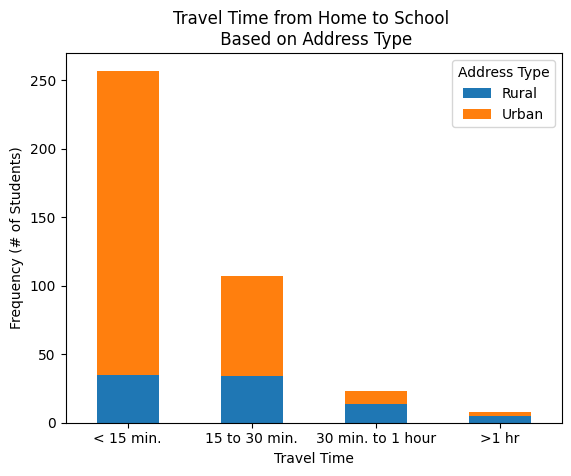

In [32]:
table.plot.bar(stacked=True, rot=0).set_ylabel('Frequency (# of Students)')
plt.title('Travel Time from Home to School \n Based on Address Type')
plt.xlabel('Travel Time')
plt.legend(title='Address Type')


_**Interpretation:** This bar graph shows that most students, overall, have shorter commute times. Urban students are much more likely to have a commute time <15 minutes, while Rural students have an equal frequency of having a commute time of 15-30 min vs. <15 min.  It is very interesting that some urban students can have very long commute times!_

_This graph is helpful when you primarily care about the total student population but want to know a little about whether there are differences by address type. It is not as easy to see (at a glance) how the top stacked category varies because it is affected by the height of the other category._

##### Side-by-Side Bar Graph

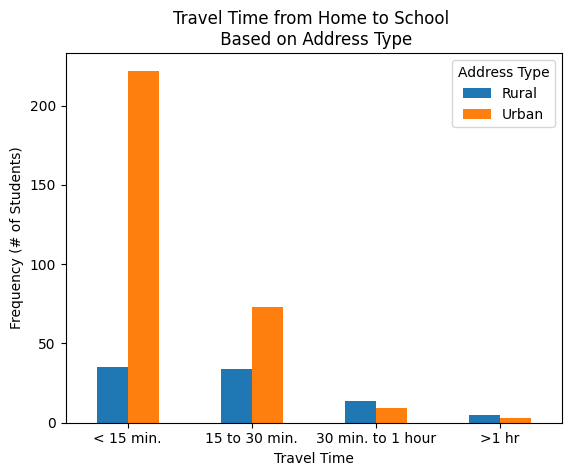

In [33]:
table.plot.bar(rot=0).set_ylabel('Frequency (# of Students)')
plt.title('Travel Time from Home to School \n Based on Address Type')
plt.xlabel('Travel Time')
plt.legend(title='Address Type')

_**Interpretation:** This side-by-side bar graph more clearly shows the differences between categories. The urban student travel time distribution falls off approximately exponentially, which makes sense because many are expected to have a school nearby. The rural student travel time distribution falls off more linearly, which is expected because schools are not as densely located._

#### Numeric Variables (and across groups)

Create a histogram, kernel density plot, and boxplot for two numeric variables across one of the categorical variables (that is, create graphs that can compare the distributions across the groups.) For at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the same plot. Add appropriate labels and titles.  

Selected numeric variables: `absences` and `G3`

Selected categorical variable: `Pstatus`

In [34]:
# Create Category version of selected categorical variable
df["Pstatus_cat"] = df.Pstatus.astype('category')
print(df.Pstatus_cat.cat.categories)
df.Pstatus_cat = df.Pstatus_cat.cat.rename_categories(['Apart','Together'])
print(df.Pstatus_cat.cat.categories)

Index(['A', 'T'], dtype='object')
Index(['Apart', 'Together'], dtype='object')


In [35]:
# Create data series for simplicity

df_absences_Pstatus_A = df.loc[df.Pstatus_cat == 'Apart', 'absences']
df_absences_Pstatus_T = df.loc[df.Pstatus_cat == 'Together', 'absences']

df_G3_Pstatus_A = df.loc[df.Pstatus_cat == 'Apart', 'G3']
df_G3_Pstatus_T = df.loc[df.Pstatus_cat == 'Together', 'G3']

##### Histograms

In [36]:
# Determine bin cutoffs for absences
bin_max_absences = max(max(df_absences_Pstatus_A), max(df_absences_Pstatus_T))
bin_structure_absences = range(0, bin_max_absences+10, 10)
list(bin_structure_absences)

[0, 10, 20, 30, 40, 50, 60, 70, 80]

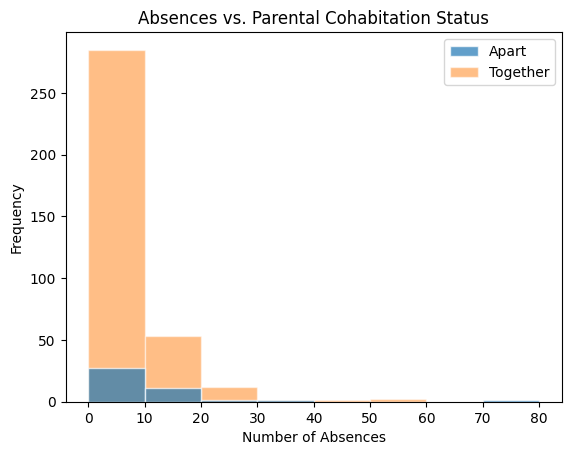

In [37]:
# Plot histogram of absences vs. Pstatus
df_absences_Pstatus_A.plot.hist(bins=bin_structure_absences,
                                edgecolor='white',
                                alpha=0.7,
                                zorder=1,
                                label='Apart')
df_absences_Pstatus_T.plot.hist(bins=bin_structure_absences,
                                edgecolor='white',
                                alpha=0.5,
                                zorder=0,
                                label='Together')
plt.title('Absences vs. Parental Cohabitation Status')
plt.xlabel('Number of Absences')
plt.legend()

_**Interpretation:** Parental cohabitation status does not appear to be a strong indicator of the number of absences. It is difficult to tell because of the imbalanced dataset (many more students in the "Together" category), but the same general trend follows both categories. Most students have few absences, and the number of absences decreases roughly exponentially for subsequent bins._

In [38]:
# Determine bin cutoffs for G3
bin_max_G3 = float(max(max(df_G3_Pstatus_A), max(df_G3_Pstatus_T)))
bin_structure_G3 = np.arange(0.0, bin_max_G3+5, 2.5)
list(bin_structure_G3)

[np.float64(0.0),
 np.float64(2.5),
 np.float64(5.0),
 np.float64(7.5),
 np.float64(10.0),
 np.float64(12.5),
 np.float64(15.0),
 np.float64(17.5),
 np.float64(20.0),
 np.float64(22.5)]

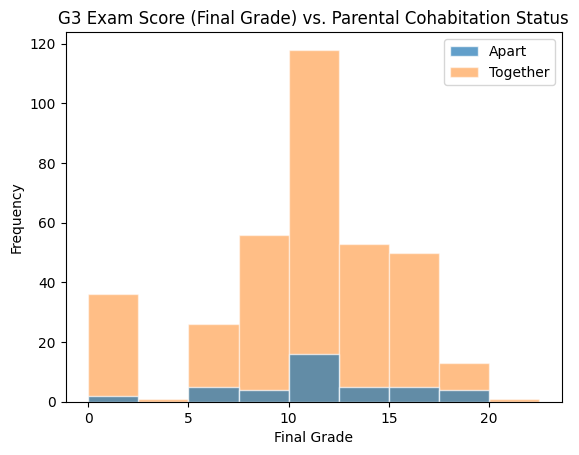

In [39]:
# Plot histogram of G3 vs. Pstatus
df_G3_Pstatus_A.plot.hist(bins=bin_structure_G3,
                                edgecolor='white',
                                alpha=0.7,
                                zorder=1,
                                label='Apart')
df_G3_Pstatus_T.plot.hist(bins=bin_structure_G3,
                                edgecolor='white',
                                alpha=0.5,
                                zorder=0,
                                label='Together')
plt.title('G3 Exam Score (Final Grade) vs. Parental Cohabitation Status')
plt.xlabel('Final Grade')
plt.legend()

_**Interpretation:** Parental cohabitation status does not appear to be a strong indicator of the final grade. It is difficult to tell because of the imbalanced dataset (many more students in the "Together" category), but the same general grade trend follows both categories. Final grades are most frequent in the 10-12.5 bin, and there is a very rough normal distribution around this approximate mean. There is a small bump in the 0-2.5 bin, indicating a number of students may not have taken the exam._

_To better visualize the trend, this histogram will be normalized using the `density=True` argument._

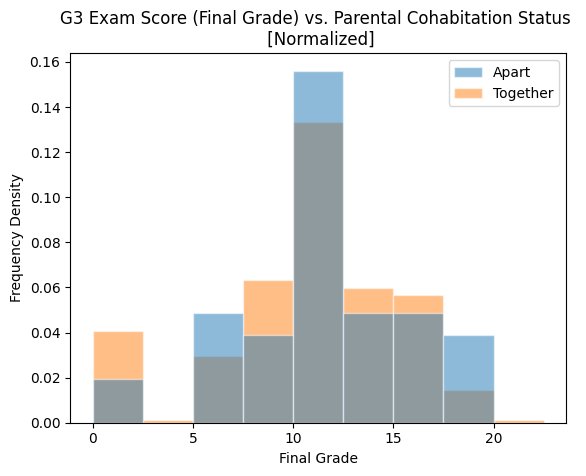

In [40]:
# Plot normalized (density) histogram for same variables
df_G3_Pstatus_A.plot.hist(bins=bin_structure_G3,
                                edgecolor='white',
                                alpha=0.5,
                                zorder=1,
                                label='Apart',
                                density=True)
df_G3_Pstatus_T.plot.hist(bins=bin_structure_G3,
                                edgecolor='white',
                                alpha=0.5,
                                zorder=0,
                                label='Together',
                                density=True)
plt.title('G3 Exam Score (Final Grade) vs. Parental Cohabitation Status \n [Normalized]')
plt.xlabel('Final Grade')
plt.ylabel('Frequency Density')
plt.legend()

_**Interpretation:** This normalized histogram (same data as the previous plot) shows more clearly that there is a similar shape for both parental cohabitation status categories. The "Together" category is slightly more normal but also interestingly has an increased rate of scores in the lowest bin (approximately double)._

##### Kernel Density Plots

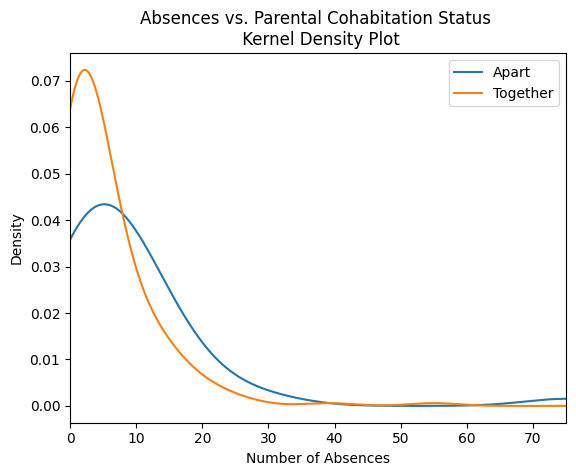

In [41]:
# Plot kernel density function of absences vs. Pstatus
df_absences_Pstatus_A.plot.density(bw_method = 0.5,
                                label='Apart')
df_absences_Pstatus_T.plot.density(bw_method = 0.5,
                                label='Together')
plt.title('Absences vs. Parental Cohabitation Status \n Kernel Density Plot')
plt.xlabel('Number of Absences')
plt.xlim(0,max(max(df_absences_Pstatus_A), max(df_absences_Pstatus_T)))
plt.legend()

_**Interpretation:** As seen with the previous histogram, most absences are in the lowest bins and each successive bin typically has fewer observations. However, this kernel density view helps us better recognize that there is an apparent difference in absences based on parental cohabitation status. It appears that students with cohabitating parents ("Together") are more likely to have very few absences in the school year (fewer than 10)._

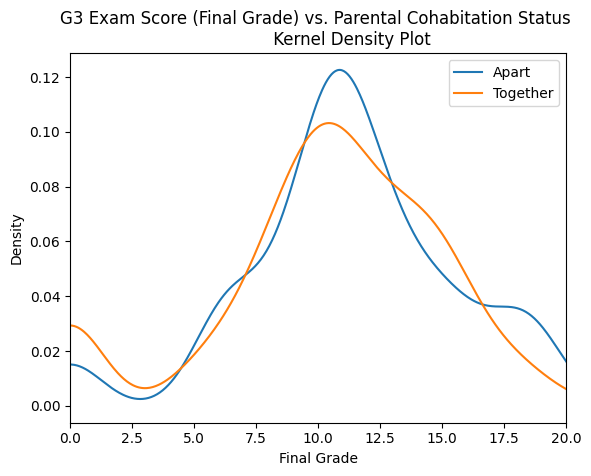

In [42]:
# Plot density kernel function of G3 vs. Pstatus
df_G3_Pstatus_A.plot.density(bw_method = 0.3,
                                label='Apart')
df_G3_Pstatus_T.plot.density(bw_method = 0.3,
                                label='Together')
plt.title('G3 Exam Score (Final Grade) vs. Parental Cohabitation Status \n \
            Kernel Density Plot')
plt.xlabel('Final Grade')
plt.xlim(0, 20)
plt.legend()

_**Interpretation:** As seen with the previous histogram, grades are most frequently distributed for each category in the vicinity of 10-12.5. We can see the same bump, particularly for the "Together" category, in the very lowest range, likely due to a number of students not taking the exam and receiving no credit. The same trends are shown in the normalized histogram plot, but due to uncertainty in the smoothing accuracy (for a given `bw_method` value), the normalized histogram is more interpretable._

_As a bonus, the following plot will explore how the `bw_method` value changes the prominence of features._

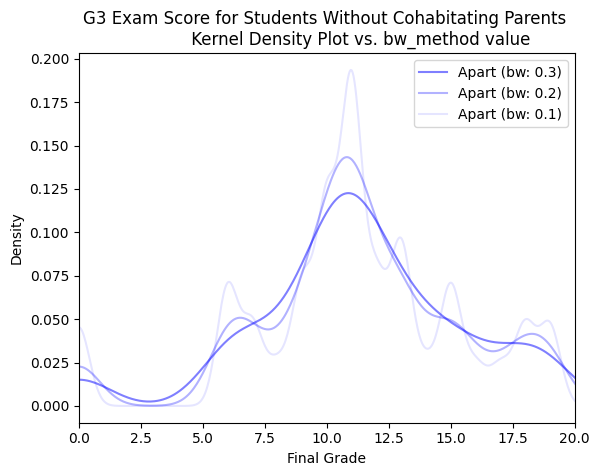

In [43]:
# Explore plot sensitivity to bw_method value
df_G3_Pstatus_A.plot.density(bw_method = 0.3, label='Apart (bw: 0.3)',
                             color = 'blue', alpha=0.5)
df_G3_Pstatus_A.plot.density(bw_method = 0.2, label='Apart (bw: 0.2)',
                             color = 'blue', alpha=0.3)
df_G3_Pstatus_A.plot.density(bw_method = 0.1, label='Apart (bw: 0.1)',
                             color = 'blue', alpha=0.1)
plt.title('G3 Exam Score for Students Without Cohabitating Parents \n \
            Kernel Density Plot vs. bw_method value')
plt.xlabel('Final Grade')
plt.xlim(0, 20)
plt.legend()

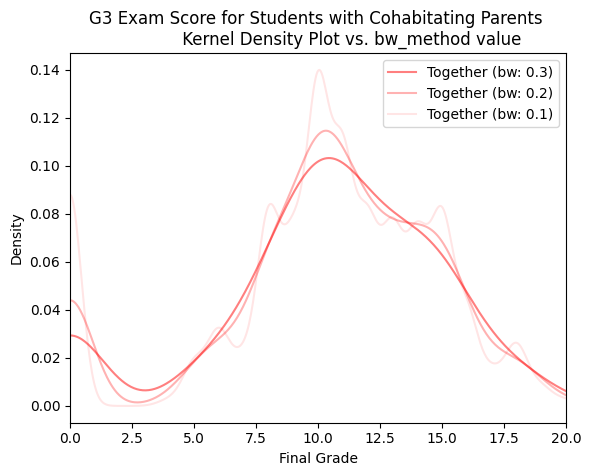

In [44]:
# Explore plot sensitivity to bw_method value
df_G3_Pstatus_T.plot.density(bw_method = 0.3, label='Together (bw: 0.3)',
                             color = 'red', alpha=0.5)
df_G3_Pstatus_T.plot.density(bw_method = 0.2, label='Together (bw: 0.2)',
                             color = 'red', alpha=0.3)
df_G3_Pstatus_T.plot.density(bw_method = 0.1, label='Together (bw: 0.1)',
                             color = 'red', alpha=0.1)
plt.title('G3 Exam Score for Students with Cohabitating Parents \n \
            Kernel Density Plot vs. bw_method value')
plt.xlabel('Final Grade')
plt.xlim(0, 20)
plt.legend()

_**Interpretation:** As expected, features become more prominent with lower bw_method values (less smoothing), but this increases complexity and risk of over-exaggeration in certain areas. In comparision with the histogram plots, it appears that a bw_method value of 0.3 is ideal for viewing overall trends without being overly sensitive to outliers or noise._

##### Box Plots

Text(0.5, 1.0, 'Absences vs. Parental Cohabitation Status')

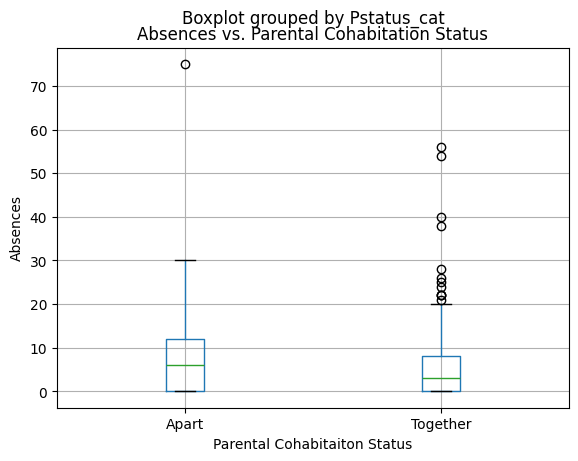

In [45]:
# Create boxplot for absences vs. Pstatus
df.boxplot(column = 'absences', by = 'Pstatus_cat', ).set_ylabel('Absences')
plt.xlabel('Parental Cohabitaiton Status')
plt.title('Absences vs. Parental Cohabitation Status')

_**Interpretation:** In the "Apart" category, we clearly see that there is one single outlier with more than 70 absences. There are several outliers in the "Together" category, but none are as severe and many are grouped just beyond the "whisker" (approximately between 1.5x and 2.5x the interquartile range from Q3). The grouping of absence numbers is tighter for the "Together" category but not by much. The median is also notably lower for the "Together" category. This visualization of data spread better highlights the groupings of outliers than in the previous plots._

Text(0.5, 1.0, 'G3 (Final Exam) Score vs. Parental Cohabitation Status')

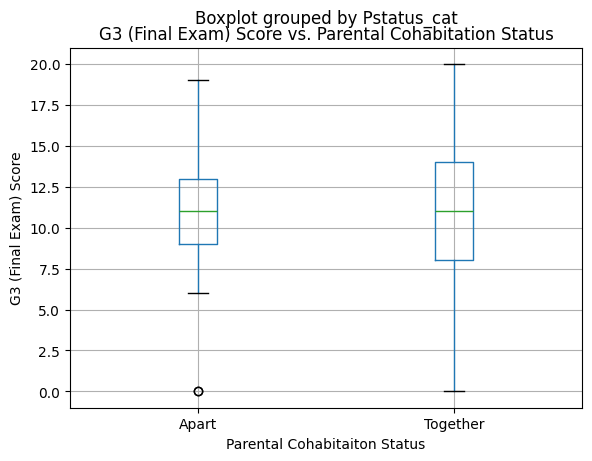

In [46]:
# Create boxplot for G3 vs. Pstatus
df.boxplot(column = 'G3', by = 'Pstatus_cat', ).set_ylabel('G3 (Final Exam) Score')
plt.xlabel('Parental Cohabitaiton Status')
plt.title('G3 (Final Exam) Score vs. Parental Cohabitation Status')

_**Interpretation:** One significant difference between the categories is that the "Apart" category's lower whisker does not extend to the bottom of the range. Accordingly, we see a set of outliers with a score of zero, but it is difficult to see how many observations are grouped together there. The "Together" category had enough students with a very low score that the whisker extends all the way to zero. We can't see any "outliers" on the low end there because they are not significantly lower than the Q1 value. We also see a broader range of values in the Q1-Q1 range, with a very similar median. This matches our observation from the histograms._

##### Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). Color the points by a categorical variable in each. Add appropriate labels and titles.

Selected numeric variables: `absences`, `G1`, and `G3`

Selected categorical variable: `Pstatus`

Text(0.5, 0, 'Number of Absences')

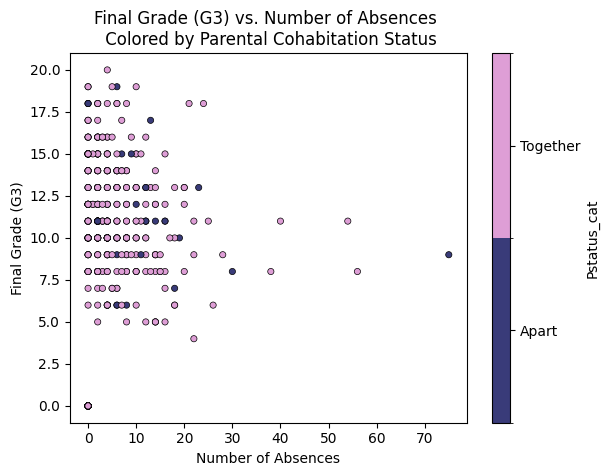

In [47]:
# Scatterplot of G3 vs. absences, colored by Pstatus

df.plot.scatter('absences', 'G3',
                c='Pstatus_cat',
                cmap='tab20b',
                edgecolors='black',
                linewidths=0.5)
plt.title('Final Grade (G3) vs. Number of Absences \n Colored by Parental Cohabitation Status')
plt.ylabel('Final Grade (G3)')
plt.xlabel('Number of Absences')

_**Interpretation:** While most of the grades seem independent of number of absences for students with fewer than 30 absences, there is a trend that students with the most absences (more than 30) are much less likely to receive a top grade, which makes sense. However, there are few students in this category, reducing the statistical significance of the claim. There does not appear to be a difference based on parental cohabitation status; the blue dots are evenly interspersed throughout the pink dots._

Text(0.5, 0, 'First Period Grade (G1)')

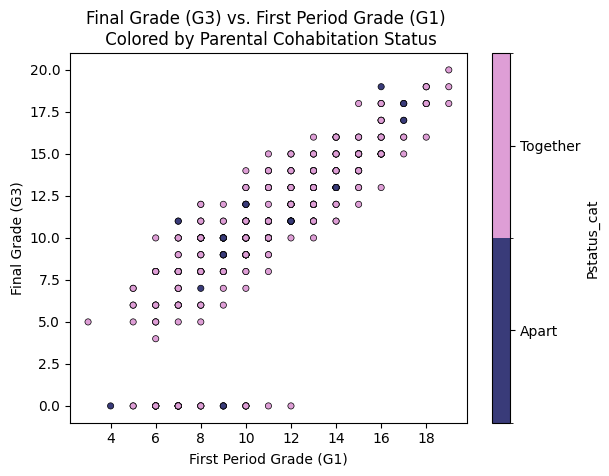

In [48]:
# Scatterplot of G3 vs. G1, colored by Pstatus

df.plot.scatter('G1', 'G3',
                c='Pstatus_cat',
                cmap='tab20b',
                edgecolors='black',
                linewidths=0.5)
plt.title('Final Grade (G3) vs. First Period Grade (G1) \n Colored by Parental Cohabitation Status')
plt.ylabel('Final Grade (G3)')
plt.xlabel('First Period Grade (G1)')

_**Interpretation:** There is a clear positive correlation between G1 and G3. It makes sense that students with higher initial achievement will have better grades in the end. I am surprised that there are no complete outliers that had an inverse relationship to the expectation. Again, it does not appear that parental cohabitation status greatly affects either the first period grade or the final grade based on this plot. It is also interesting that several students got a grade of zero on G3 but none did on G1. This makes me wonder if that is due to a number of students dropping out before the end of the year instead of just being absent on exam days._



---

## Part 2 - Plotting the NFL Data


### Task 1: Read in the Data

##### Instructions: Read in dataset from URL or download and read in locally. Check out the first few observations of the data.

_Note: The scoresFull.csv file was downloaded from the link and then read in locally._

In [49]:
scores = pd.read_csv('scoresFull.csv')
scores.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


In [50]:
scores.describe()

,season,AQ1,AQ2,AQ3,AQ4,AOT,AOT2,AFinal,HQ1,HQ2,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
count,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,...,3471.000000,3471.000000,3471.000000,3471.00000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000
mean,2008.000000,3.924806,6.241429,4.386920,5.890233,-0.824258,-0.996831,20.557188,4.828868,7.105157,...,0.687986,6.085278,50.391242,3.69202,9.234226,0.455776,0.906655,30.486621,2.616825,2.515846
std,3.742196,4.490700,5.221593,4.632717,5.278775,0.857044,0.136828,10.195586,4.726903,5.702788,...,0.827323,2.699064,25.530559,2.28160,3.916513,0.702191,1.011142,4.621898,14.970407,5.940801
min,2002.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,14.750000,-46.000000,-18.500000
25%,2005.000000,0.000000,3.000000,0.000000,0.000000,-1.000000,-1.000000,13.000000,0.000000,3.000000,...,0.000000,4.000000,32.000000,2.00000,6.000000,0.000000,0.000000,27.420000,-7.000000,-3.000000
50%,2008.000000,3.000000,7.000000,3.000000,7.000000,-1.000000,-1.000000,20.000000,3.000000,7.000000,...,1.000000,6.000000,47.000000,3.00000,8.000000,0.000000,1.000000,30.520000,3.000000,3.000000
75%,2011.000000,7.000000,10.000000,7.000000,9.000000,-1.000000,-1.000000,27.000000,7.000000,10.000000,...,1.000000,8.000000,65.000000,5.00000,12.000000,1.000000,1.000000,33.570000,12.000000,7.000000
max,2014.000000,28.000000,35.000000,24.000000,31.000000,6.000000,6.000000,59.000000,28.000000,35.000000,...,4.000000,20.000000,175.000000,14.00000,24.000000,5.000000,6.000000,46.220000,59.000000,26.500000


In [51]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3471 entries, 0 to 3470
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   week             3471 non-null   object 
 1   date             3471 non-null   object 
 2   day              3471 non-null   object 
 3   season           3471 non-null   int64  
 4   awayTeam         3471 non-null   object 
 5   AQ1              3471 non-null   int64  
 6   AQ2              3471 non-null   int64  
 7   AQ3              3471 non-null   int64  
 8   AQ4              3471 non-null   int64  
 9   AOT              3471 non-null   int64  
 10  AOT2             3471 non-null   int64  
 11  AFinal           3471 non-null   int64  
 12  homeTeam         3471 non-null   object 
 13  HQ1              3471 non-null   int64  
 14  HQ2              3471 non-null   int64  
 15  HQ3              3471 non-null   int64  
 16  HQ4              3471 non-null   int64  
 17  HOT           

_Wow! That's a lot of data!_

##### Convert the `homeTeam`, `awayTeam`, `day`, `stadium`, `startTime`, `toss`, `roof`, and `surface` to category type variables.

In [52]:
# Create Category version of selected categorical variables

scores["homeTeam_cat"] = scores.homeTeam.astype('category')
print('homeTeam_cat Categories:')
print(scores.homeTeam_cat.cat.categories)

scores["awayTeam_cat"] = scores.awayTeam.astype('category')
print('awayTeam_cat Categories:')
print(scores.awayTeam_cat.cat.categories)

scores["day_cat"] = scores.day.astype('category')
print('day_cat Categories:')
print(scores.day_cat.cat.categories)

scores["stadium_cat"] = scores.stadium.astype('category')
print('stadium_cat Categories:')
print(scores.stadium_cat.cat.categories)

scores["startTime_cat"] = scores.startTime.astype('category')
print('startTime_cat Categories:')
print(scores.startTime_cat.cat.categories)

scores["toss_cat"] = scores.toss.astype('category')
print('toss_cat Categories:')
print(scores.toss_cat.cat.categories)

scores["roof_cat"] = scores.roof.astype('category')
print('roof_cat Categories:')
print(scores.roof_cat.cat.categories)

scores["surface_cat"] = scores.surface.astype('category')
print('surface_cat Categories:')
print(scores.surface_cat.cat.categories)

homeTeam_cat Categories:
Index(['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens',
       'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears',
       'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys',
       'Denver Broncos', 'Detroit Lions', 'Green Bay Packers',
       'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars',
       'Kansas City Chiefs', 'Miami Dolphins', 'Minnesota Vikings',
       'New England Patriots', 'New Orleans Saints', 'New York Giants',
       'New York Jets', 'Oakland Raiders', 'Philadelphia Eagles',
       'Pittsburgh Steelers', 'San Diego Chargers', 'San Francisco 49ers',
       'Seattle Seahawks', 'St. Louis Rams', 'Tampa Bay Buccaneers',
       'Tennessee Titans', 'Washington Redskins'],
      dtype='object')
awayTeam_cat Categories:
Index(['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens',
       'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears',
       'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys',
 

Some categories should be cleaned up. For example, days can be ordered and surfaces can be consolidated because some have a stray space at the end.

In [53]:
# Reorder the days categories
ordered_days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
scores.day_cat = scores.day_cat.cat.reorder_categories(ordered_days, ordered = True)
scores.day_cat.cat.categories

Index(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], dtype='object')

In [54]:
# Remove stray spaces at end of surface categories
scores.surface_cat = scores.surface_cat.str.strip()
scores.surface_cat = scores.surface_cat.astype('category')
scores.surface_cat.cat.categories

Index(['a_turf', 'astroplay', 'astroturf', 'dessograss', 'fieldturf', 'grass',
       'matrixturf', 'sportturf'],
      dtype='object')

### Task 2: Summarize the Data

#### Remove any data where the week is not 1 through 17

In [55]:
scores.week.value_counts()

,count
week,
1,208
14,208
15,208
16,208
13,208
17,208
2,207
12,205
11,201


In [56]:
# Remove rows with non-numbered weeks
post_season = ['WildCard', 'Division', 'ConfChamp', 'SuperBowl']
scores = scores.loc[~scores.week.isin(post_season)]     # '~' is logical negation
scores.week.value_counts()

,count
week,
1,208
14,208
15,208
16,208
17,208
13,208
2,207
12,205
11,201


In [58]:
# Re-order weeks numerically (not alphabetically)
week_order = [str(x) for x in range(1,18)]
scores.week = scores.week.astype('category')
scores.week = scores.week.cat.reorder_categories(week_order, ordered=True)
scores.week.cat.categories

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17'],
      dtype='object')

#### Summarize some variables grouped by season and week, season alone, and week alone (three different scenarios).

##### Produce some common numeric summaries of variables across these different groups.

Selected numerical variables: `HminusAScore`, `HtotalYds`, and `HfirstDowns`

In [70]:
# Grouped by season only
# Average home team score above away team score, by season
HminusAScore_season = pd.crosstab(index=scores.homeTeam_cat,
                               columns=scores.season,
                               values=scores.HminusAScore,
                               aggfunc=['mean'])
HminusAScore_season.head()

mean                                                \
season              2002    2003    2004   2005    2006   2007    2008   
homeTeam_cat                                                             
Arizona Cardinals -5.750  -4.750   5.000 -0.125  -2.500  4.625   8.000   
Atlanta Falcons    8.375  -8.125   6.875  1.125  -2.000 -9.125   9.125   
Baltimore Ravens  -2.625  12.750  11.375  6.250  11.500 -1.125  12.500   
Buffalo Bills      0.000   4.125   8.000 -1.125   1.125 -3.000  -1.250   
Carolina Panthers  0.125   1.250   0.125  8.250  -5.375 -8.625  15.375   

                                                                  
season               2009    2010    2011   2012    2013    2014  
homeTeam_cat                                                      
Arizona Cardinals  -1.500  -1.625   1.375  0.375   8.875   2.875  
Atlanta Falcons     5.250   9.375   8.500  7.500  -2.625   0.125  
Baltimore Ravens   16.875   7.000  12.500  9.375   2.125  11.750  
Buffalo Bills      -0.500  -8.375   4.125 -0.375   3.500   6.000  
Carolina Panthers   1.000 -13.625   0.375 -4.625  13.875  -1.500

In [60]:
# Aggregated again across teams, showing league-wide statistics
# Average home team score above away team score, by season
HminusAScore_season.describe()

mean                                                         \
season       2002       2003       2004       2005       2006       2007   
count   32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean     2.246094   3.554688   2.507812   3.648438   0.847656   2.867188   
std      6.358057   7.825010   6.658424   6.534141   6.616568   8.333881   
min    -13.375000  -9.125000 -10.625000 -11.250000  -9.000000 -12.000000   
25%     -1.843750  -1.468750  -3.031250  -1.343750  -3.625000  -4.031250   
50%      2.062500   2.125000   1.750000   3.437500  -0.250000   1.937500   
75%      4.906250  10.750000   7.625000   8.312500   4.593750   9.125000   
max     15.625000  18.500000  13.750000  16.750000  15.500000  21.500000   

                                                                          \
season       2008       2009       2010       2011       2012       2013   
count   32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean     2.558594   2.207031   1.894531   3.265625   2.433594   3.105469   
std      8.760764   8.721417   6.850588   8.302906   7.854716   7.858893   
min    -22.000000 -16.375000 -13.625000  -9.875000 -14.750000 -15.875000   
25%     -2.562500  -1.656250  -3.187500  -3.250000  -3.218750  -1.093750   
50%      4.625000   4.000000   1.875000   1.750000   3.000000   2.812500   
75%      8.750000   6.625000   5.687500   7.468750   7.781250   6.156250   
max     16.500000  18.375000  15.625000  23.250000  18.500000  18.375000   

                   
season       2014  
count   32.000000  
mean     2.488281  
std      7.870702  
min    -10.375000  
25%     -2.343750  
50%      2.187500  
75%      8.937500  
max     19.375000

In [69]:
# Grouped by season only
# Average home team total yards per game, by season
HtotalYds_season = pd.crosstab(index=scores.homeTeam_cat,
                               columns=scores.season,
                               values=scores.HtotalYds,
                               aggfunc=['mean'])
HtotalYds_season.head()

mean                                               \
season                2002     2003     2004     2005     2006     2007   
homeTeam_cat                                                              
Arizona Cardinals  284.000  309.000  284.625  361.375  321.375  377.375   
Atlanta Falcons    329.750  297.625  335.125  347.250  343.000  314.750   
Baltimore Ravens   279.125  324.375  274.250  316.500  304.875  315.625   
Buffalo Bills      369.750  289.375  294.000  247.625  292.125  287.500   
Carolina Panthers  274.500  347.875  309.000  306.875  307.875  271.625   

                                                                         \
season                2008     2009     2010     2011     2012     2013   
homeTeam_cat                                                              
Arizona Cardinals  368.375  342.000  274.875  344.625  282.250  346.625   
Atlanta Falcons    391.875  323.250  355.125  367.875  343.625  329.375   
Baltimore Ravens   306.625  396.250  339.875  340.875  400.625  298.375   
Buffalo Bills      312.625  293.375  293.000  384.750  346.500  371.500   
Carolina Panthers  371.375  329.750  265.875  382.625  329.375  331.250   

                            
season                2014  
homeTeam_cat                
Arizona Cardinals  340.875  
Atlanta Falcons    393.000  
Baltimore Ravens   370.750  
Buffalo Bills      319.500  
Carolina Panthers  333.500

In [62]:
# Aggregated again across teams, showing league-wide statistics
HtotalYds_season.describe()

mean                                                  \
season        2002        2003        2004        2005        2006   
count    32.000000   32.000000   32.000000   32.000000   32.000000   
mean    332.519531  330.015625  333.742188  323.871094  327.597656   
std      37.914631   30.749586   45.426506   41.309311   42.270821   
min     250.625000  260.125000  246.375000  244.000000  246.875000   
25%     303.156250  312.281250  305.281250  306.312500  304.843750   
50%     333.312500  330.562500  323.375000  327.125000  322.375000   
75%     364.906250  353.625000  358.000000  350.437500  353.375000   
max     392.000000  379.625000  423.750000  395.625000  415.250000   

                                                                    \
season        2007        2008        2009        2010        2011   
count    32.000000   32.000000   32.000000   32.000000   32.000000   
mean    327.589844  335.062500  347.171875  342.707031  352.816406   
std      39.236992   44.512922   48.432358   35.826540   50.417491   
min     234.625000  238.750000  231.125000  265.875000  268.375000   
25%     301.781250  310.843750  313.375000  321.968750  320.562500   
50%     317.250000  344.875000  349.562500  346.500000  346.937500   
75%     361.593750  367.250000  386.062500  368.812500  386.218750   
max     410.750000  422.125000  438.375000  400.125000  492.625000   

                                            
season        2012        2013        2014  
count    32.000000   32.000000   32.000000  
mean    349.058594  357.195312  351.535156  
std      43.410735   42.638294   39.138469  
min     272.750000  281.500000  276.250000  
25%     322.781250  329.250000  322.281250  
50%     355.250000  352.875000  339.625000  
75%     376.156250  379.375000  377.718750  
max     425.750000  455.500000  425.250000

In [68]:
# Grouped by season only
# Average home team first downs per game, by season
HfirstDowns_season = pd.crosstab(index=scores.homeTeam_cat,
                               columns=scores.season,
                               values=scores.HfirstDowns,
                               aggfunc=['mean'])
HfirstDowns_season.head()

mean                                                  \
season               2002    2003    2004    2005    2006    2007    2008   
homeTeam_cat                                                                
Arizona Cardinals  17.125  18.250  18.375  19.000  19.000  20.250  20.625   
Atlanta Falcons    20.000  17.500  19.125  20.000  18.125  16.250  18.875   
Baltimore Ravens   17.000  16.375  16.875  19.125  17.000  19.125  17.500   
Buffalo Bills      24.125  17.875  17.000  16.375  16.625  16.625  17.875   
Carolina Panthers  15.625  19.000  18.750  17.125  17.125  14.750  19.000   

                                                                  
season               2009   2010    2011    2012    2013    2014  
homeTeam_cat                                                      
Arizona Cardinals  20.125  15.50  18.500  17.500  21.500  19.500  
Atlanta Falcons    20.250  23.00  22.625  19.375  20.375  20.875  
Baltimore Ravens   21.375  18.75  19.375  21.750  17.625  22.500  
Buffalo Bills      15.625  15.75  20.375  18.500  19.250  17.750  
Carolina Panthers  18.000  14.50  19.750  19.000  20.375  21.375

In [64]:
# Aggregated again across teams, showing league-wide statistics
HfirstDowns_season.describe()

mean                                                         \
season       2002       2003       2004       2005       2006       2007   
count   32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean    19.503906  19.097656  19.195312  18.894531  18.761719  18.925781   
std      2.444234   1.788949   2.453383   2.382757   2.384713   2.204481   
min     15.375000  15.375000  14.750000  13.500000  14.500000  13.625000   
25%     17.968750  17.875000  17.625000  17.531250  17.312500  17.500000   
50%     19.750000  19.000000  18.687500  19.187500  18.437500  19.250000   
75%     21.343750  20.625000  20.687500  20.000000  20.312500  20.250000   
max     24.125000  22.000000  25.625000  24.250000  24.625000  23.750000   

                                                                          \
season       2008       2009       2010       2011       2012       2013   
count   32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean    18.753906  19.519531  19.183594  19.789062  20.203125  20.585938   
std      2.417277   2.849751   2.324914   2.720227   2.775314   2.496659   
min     12.250000  12.875000  14.500000  15.625000  15.500000  16.500000   
25%     17.468750  17.718750  17.937500  17.937500  18.500000  19.187500   
50%     18.750000  20.000000  19.437500  19.750000  19.687500  20.375000   
75%     20.343750  21.187500  21.156250  20.937500  21.781250  21.531250   
max     22.750000  26.750000  23.000000  26.875000  28.125000  28.375000   

                   
season       2014  
count   32.000000  
mean    20.222656  
std      2.650459  
min     14.250000  
25%     18.468750  
50%     19.687500  
75%     22.218750  
max     25.250000

_**Interpretation:**_

+ _The first table shows trends in each team's "home team advantage" across seasons. You can track generally how well a team is playing on their home field over time. The league-wide aggregation below the first table shows a more interesting trend: regardless of the year, there is typically a 2-3 point home team advantage. Some teams obviously can't capitalize on this because they are not very good in a given year, but on average, being at your home field should help._

+ _The next pair of tables shows that offensive performance (in terms of home team total yards) varies by year but not much across the aggregated league, indicating that the "art of offense" is relatively stable._

+ _The final pair of tables shows that there is very little deviation of the number of a home team's first downs across teams or seasons. This is somewhat surprising because I would expect there to be a larger standard deviation to capture the teams that have a very underperforming offense and cannot seem to make third down or fourth down conversions._

In [67]:
# Grouped by week only
# Average home team score above away team score, by week
HminusAScore_week = pd.crosstab(index=scores.homeTeam_cat,
                               columns=scores.week,
                               values=scores.HminusAScore,
                               aggfunc=['mean'])
HminusAScore_week.head()

mean                                             \
week                      1          2          3          4         5   
homeTeam_cat                                                             
Arizona Cardinals  3.000000  -4.333333   1.000000  10.166667  8.333333   
Atlanta Falcons    8.000000   9.333333  11.333333   8.166667 -8.333333   
Baltimore Ravens   9.333333   9.857143  13.500000   8.250000  2.666667   
Buffalo Bills      6.625000  10.800000  -7.333333  -6.875000 -1.857143   
Carolina Panthers -8.000000   3.625000  -3.200000   1.833333  3.444444   

                                                                              \
week                      6       7          8         9        10        11   
homeTeam_cat                                                                   
Arizona Cardinals -1.833333  -0.600  -2.666667 -4.500000 -0.777778  7.500000   
Atlanta Falcons   -2.625000   5.500  -1.000000  4.333333 -1.285714 -2.333333   
Baltimore Ravens   7.500000  11.500  10.400000  6.200000  9.800000  6.500000   
Buffalo Bills     -0.250000   1.500   8.250000 -4.750000  3.000000 -0.333333   
Carolina Panthers       NaN   0.875  -3.714286 -7.000000 -1.625000  1.888889   

                                                                               
week                      12     13         14         15        16        17  
homeTeam_cat                                                                   
Arizona Cardinals  -6.777778   3.00   9.000000   2.333333 -2.285714  3.142857  
Atlanta Falcons    -1.300000  -2.00   5.400000   5.625000  9.750000 -1.555556  
Baltimore Ravens   12.000000   3.75  10.125000  10.285714 -0.600000  9.142857  
Buffalo Bills       7.500000   3.00   3.571429  -3.142857 -3.500000  8.400000  
Carolina Panthers -19.666667  11.40   0.750000   3.857143  7.000000  5.000000

In [71]:
# Aggregated again across teams, showing league-wide statistics
HminusAScore_week.describe()

mean                                                         \
week           1          2          3          4          5          6   
count  32.000000  32.000000  32.000000  32.000000  32.000000  31.000000   
mean    2.668228   3.126811   0.763666   3.593552   3.823798   2.387320   
std     7.324307   6.126774   7.980817   7.920565   6.840883   6.975303   
min   -11.500000  -7.000000 -26.000000 -12.166667  -8.400000  -9.200000   
25%    -1.937500  -2.190476  -3.050000  -3.233333  -0.250000  -2.512500   
50%     4.261905   3.479167   1.000000   3.285714   3.097222   2.833333   
75%     7.812500   7.975000   5.357143   9.525000   7.916667   8.350000   
max    20.800000  14.600000  13.500000  19.666667  18.666667  15.000000   

                                                                         \
week           7          8          9         10         11         12   
count  32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean    2.879576   3.164931   0.061223   0.632242   3.162116   1.580194   
std     6.714876   7.554019   6.475712   8.016066   5.645708   7.842299   
min   -10.000000 -13.400000 -15.000000 -28.000000  -6.571429 -19.666667   
25%    -2.464286  -2.354167  -4.562500  -1.812500  -1.270833  -2.625000   
50%     2.133929   3.465278  -0.984127   1.333333   2.100000   0.950000   
75%     7.187500   8.972222   5.041667   4.416667   6.906250   7.425000   
max    17.500000  17.666667  12.200000  16.875000  17.250000  14.666667   

                                                              
week          13         14         15         16         17  
count  32.000000  32.000000  32.000000  32.000000  32.000000  
mean    2.765737   4.323624   1.201420   1.253720   4.478274  
std     5.657217   7.368845   6.679173   8.040015   6.909667  
min    -8.250000 -15.000000 -12.000000 -16.833333  -9.600000  
25%    -1.750000   0.741071  -3.450000  -3.000000  -0.358333  
50%     2.750000   4.614286   2.416667   0.770833   4.833333  
75%     5.906250   9.062500   5.625000   7.050000   8.660714  
max    14.500000  20.666667  15.714286  16.500000  16.500000

In [72]:
# Grouped by week only
# Average home total yards, by week
HtotalYds_week = pd.crosstab(index=scores.homeTeam_cat,
                               columns=scores.week,
                               values=scores.HtotalYds,
                               aggfunc=['mean'])
HtotalYds_week.head()

mean                                                  \
week                        1           2           3           4           5   
homeTeam_cat                                                                    
Arizona Cardinals  343.200000  342.666667  311.142857  344.166667  320.500000   
Atlanta Falcons    410.500000  348.777778  338.833333  386.166667  329.333333   
Baltimore Ravens   416.333333  287.285714  372.833333  298.375000  319.000000   
Buffalo Bills      279.750000  409.800000  340.666667  333.500000  303.714286   
Carolina Panthers  256.285714  341.625000  322.000000  328.000000  285.555556   

                                                                           \
week                        6           7           8       9          10   
homeTeam_cat                                                                
Arizona Cardinals  297.666667  286.600000  340.500000  294.75  328.777778   
Atlanta Falcons    304.875000  347.166667  291.000000  321.50  345.571429   
Baltimore Ravens   328.166667  289.000000  341.800000  303.00  303.400000   
Buffalo Bills      335.000000  342.333333  286.500000  340.50  287.000000   
Carolina Panthers         NaN  350.375000  299.714286  275.75  302.375000   

                                                                               \
week                       11          12          13          14          15   
homeTeam_cat                                                                    
Arizona Cardinals  345.000000  349.444444  312.750000  342.888889  314.833333   
Atlanta Falcons    358.333333  324.900000  359.333333  371.000000  358.500000   
Baltimore Ravens   325.166667  306.875000  308.750000  358.875000  329.142857   
Buffalo Bills      297.666667  281.000000  328.375000  273.714286  292.142857   
Carolina Panthers  354.666667  205.666667  340.000000  386.375000  349.428571   

                                           
week                       16          17  
homeTeam_cat                               
Arizona Cardinals  303.285714  339.571429  
Atlanta Falcons    329.000000  332.111111  
Baltimore Ravens   363.400000  331.571429  
Buffalo Bills      316.500000  320.800000  
Carolina Panthers  312.625000  323.500000

In [73]:
# Aggregated again across teams, showing league-wide statistics
HtotalYds_week.describe()

mean                                                              \
week            1           2           3           4           5           6   
count   32.000000   32.000000   32.000000   32.000000   32.000000   31.000000   
mean   335.016492  350.250124  339.286372  350.488467  342.093869  338.336456   
std     42.356162   34.331249   38.395586   42.881169   41.774083   38.766957   
min    256.285714  273.714286  244.500000  285.400000  285.555556  260.250000   
25%    306.464286  332.250000  320.500000  325.343750  311.800000  311.785714   
50%    337.107143  351.500000  340.083333  341.625000  339.946154  341.909091   
75%    360.744048  367.464286  364.488095  378.916667  364.916667  372.133333   
max    416.333333  427.375000  412.125000  449.333333  457.000000  405.166667   

                                                                               \
week            7           8           9          10          11          12   
count   32.000000   32.000000   32.000000   32.000000   32.000000   32.000000   
mean   330.147663  337.332688  335.584908  339.659722  344.940402  338.116210   
std     39.960428   39.072918   34.792778   38.621993   35.752963   50.926434   
min    239.571429  274.333333  266.333333  268.571429  292.750000  205.666667   
25%    305.000000  309.000000  316.775000  314.350000  316.839286  307.156250   
50%    329.168831  337.444444  334.312500  337.457143  342.300000  336.625000   
75%    351.857143  353.458333  347.875000  363.362500  371.177083  373.345238   
max    420.750000  446.500000  419.166667  432.200000  436.666667  445.166667   

                                                                   
week           13          14          15          16          17  
count   32.000000   32.000000   32.000000   32.000000   32.000000  
mean   335.856200  341.300942  331.368561  335.372582  333.278299  
std     35.469182   37.553144   35.686526   42.709547   33.664817  
min    267.875000  273.714286  254.222222  221.333333  277.833333  
25%    309.291667  312.285714  311.375000  305.321429  311.558036  
50%    336.312500  344.844444  336.833333  328.812500  331.841270  
75%    358.933333  363.178571  355.841270  359.850000  355.458333  
max    408.285714  433.000000  404.428571  424.200000  404.888889

In [74]:
# Grouped by week only
# Average home team first downs, by week
HfirstDowns_week = pd.crosstab(index=scores.homeTeam_cat,
                               columns=scores.week,
                               values=scores.HfirstDowns,
                               aggfunc=['mean'])
HfirstDowns_week.head()

mean                                              \
week                       1          2          3          4          5   
homeTeam_cat                                                               
Arizona Cardinals  19.000000  19.333333  19.285714  20.166667  19.166667   
Atlanta Falcons    22.000000  21.888889  18.166667  22.333333  19.666667   
Baltimore Ravens   24.000000  16.571429  22.500000  18.000000  20.666667   
Buffalo Bills      16.875000  22.200000  20.666667  18.500000  18.857143   
Carolina Panthers  16.428571  18.875000  20.400000  17.833333  16.333333   

                                                                      \
week                       6          7          8      9         10   
homeTeam_cat                                                           
Arizona Cardinals  16.000000  18.400000  18.833333  18.00  19.666667   
Atlanta Falcons    16.375000  19.333333  22.000000  18.50  20.000000   
Baltimore Ravens   17.333333  18.000000  21.200000  17.00  19.000000   
Buffalo Bills      20.250000  19.500000  15.000000  20.00  14.000000   
Carolina Panthers        NaN  19.875000  18.857143  20.25  16.875000   

                                                                          \
week                      11         12         13         14         15   
homeTeam_cat                                                               
Arizona Cardinals  19.000000  20.111111  17.000000  19.666667  19.666667   
Atlanta Falcons    21.333333  19.700000  19.666667  19.600000  20.125000   
Baltimore Ravens   18.166667  16.875000  18.000000  20.625000  16.428571   
Buffalo Bills      16.333333  17.166667  17.125000  16.857143  16.857143   
Carolina Panthers  17.777778  12.000000  17.600000  19.750000  19.000000   

                                         
week                      16         17  
homeTeam_cat                             
Arizona Cardinals  17.857143  17.571429  
Atlanta Falcons    18.250000  18.777778  
Baltimore Ravens   19.600000  18.000000  
Buffalo Bills      16.166667  17.800000  
Carolina Panthers  16.875000  18.000000

In [75]:
# Aggregated again across teams, showing league-wide statistics
HfirstDowns_week.describe()

mean                                                         \
week           1          2          3          4          5          6   
count  32.000000  32.000000  32.000000  32.000000  32.000000  31.000000   
mean   19.068176  20.008557  19.895883  20.034883  19.494097  19.226746   
std     2.095954   2.338722   2.094056   2.539978   2.405197   2.481588   
min    14.250000  15.285714  15.333333  16.000000  15.375000  14.500000   
25%    17.690476  18.371429  18.683333  18.500000  18.000000  17.666667   
50%    18.875000  20.150000  19.476190  19.291667  19.533333  19.200000   
75%    20.517857  21.966667  21.458333  20.975000  20.750000  20.614286   
max    24.000000  23.222222  24.400000  28.333333  25.000000  24.666667   

                                                                         \
week           7          8          9         10         11         12   
count  32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean   19.467915  19.736781  19.623189  19.313728  19.375533  19.081420   
std     2.349105   2.718591   1.797695   2.887481   2.156416   2.595467   
min    13.666667  13.333333  16.250000  14.000000  16.000000  12.000000   
25%    18.250000  18.482143  18.437500  17.458333  17.819444  17.750000   
50%    19.309524  19.375000  19.500000  19.183333  19.000000  19.125000   
75%    20.200893  22.000000  20.487500  20.677083  20.850000  20.425000   
max    25.500000  25.875000  24.666667  26.000000  24.166667  23.500000   

                                                              
week          13         14         15         16         17  
count  32.000000  32.000000  32.000000  32.000000  32.000000  
mean   19.266394  19.507391  19.019957  19.382403  18.797817  
std     2.137031   2.488141   2.186205   2.662380   1.992685  
min    15.000000  14.800000  13.833333  14.000000  14.800000  
25%    17.900000  18.107143  17.458333  17.650000  17.950000  
50%    19.071429  19.600000  19.422222  19.042857  19.166667  
75%    20.754464  20.357143  20.525000  21.656250  20.129464  
max    23.714286  28.000000  23.000000  24.400000  23.111111

_**Interpretation:**_

+ _The first table pair shows trends in each team's "home team advantage" across weeks (averaged across seasons). You can track generally how well a team is playing on their home field throughout the year. The league-wide aggregation below the first table shows an interesting trend: regardless of the year, there are periods (weeks) when the home team advantage seems to dissipate._

+ _The next pair of tables shows that offensive performance for a given team (in terms of home team total yards) can vary depending on the week, even when averaged across several years. For example, the Bills' offense tends to get a lot more yards in Week 2 than Week 1. This behavior averages out across all teams, so it's interesting to see that some teams have large week-to-week variability with consistent trends across various seasons._

+ _The final pair of tables is less remarkable. The home team first downs does not appear to significantly depend on the week._

In [82]:
# Grouped by season and week
# Here, we will eliminate the "homeTeam" variable (by averaging across teams)
#       to make the dataset more manageable.

# Average home team score above away team score, by season and week
HminusAScore_seasonandweek = pd.crosstab(index=scores.week,
                               columns=scores.season,
                               values=scores.HminusAScore,
                               aggfunc=['mean'])
HminusAScore_seasonandweek.head()


mean                                                               \
season      2002      2003      2004      2005       2006      2007      2008   
week                                                                            
1       3.000000  6.187500  2.187500  6.562500  -6.812500  2.250000  3.312500   
2      -4.500000  0.437500  1.437500  7.062500   9.312500  2.437500 -3.800000   
3       4.857143 -0.928571  2.857143  4.500000  -2.071429  3.687500  7.062500   
4       9.357143 -1.071429 -0.428571  2.642857   5.714286  0.714286  4.538462   
5      -0.785714  2.071429  0.071429  4.214286  11.642857  3.214286  3.928571   

                                                                     
season       2009      2010      2011      2012      2013      2014  
week                                                                 
1        0.312500  6.812500  2.750000  3.187500 -0.125000  1.875000  
2       -0.687500  6.562500  8.250000  8.687500  4.250000  2.937500  
3       -0.500000 -2.875000 -1.437500 -1.437500  8.187500  2.500000  
4       12.857143  0.142857  1.187500 -2.733333  3.933333  4.384615  
5        0.642857  1.285714  5.230769  3.785714  5.000000  8.800000

In [84]:
# Standard deviation of average home team score above away team score,
#   by season and week
HminusAScore_seasonandweek_std = pd.crosstab(index=scores.week,
                               columns=scores.season,
                               values=scores.HminusAScore,
                               aggfunc=['std'])
HminusAScore_seasonandweek_std.head()


std                                                         \
season       2002       2003       2004       2005       2006       2007   
week                                                                       
1       12.121606  16.951770   9.860485  13.832179  12.533788  15.997917   
2       17.530925  19.602615  10.112492  16.514514  12.851556  13.058682   
3       15.114217  13.958534  13.535464  12.420517   9.957327  16.369560   
4       14.248385  17.058561  12.965720  14.041735  19.392420  15.939446   
5       12.819328  11.418368  11.848170  17.638152  12.382414  16.875921   

                                                                          \
season       2008       2009       2010       2011       2012       2013   
week                                                                       
1       16.234608  14.206659   9.282376  16.687321  14.510772  10.594810   
2       13.251415  11.768425  14.696797  15.097461  11.335600   9.801360   
3       13.483169  16.860210  14.417004   9.708888  12.966463  17.026328   
4       11.296130  12.581165  14.935024  11.320888  17.210739  18.238369   
5       17.569485  21.660340  15.449315  16.719020  18.009308  12.335066   

                   
season       2014  
week               
1       13.445569  
2       15.255464  
3       17.481419  
4       20.221847  
5       13.143168

In [87]:
# Grouped by season and week
# Here, we will eliminate the "homeTeam" variable (by averaging across teams)
#       to make the dataset more manageable.

# Average home team total yards, by season and week
HtotalYds_seasonandweek = pd.crosstab(index=scores.week,
                               columns=scores.season,
                               values=scores.HtotalYds,
                               aggfunc=['mean'])
HtotalYds_seasonandweek.head()

mean                                                  \
season        2002        2003        2004        2005        2006   
week                                                                 
1       348.625000  314.937500  341.937500  334.187500  275.125000   
2       306.812500  314.062500  298.500000  358.187500  379.375000   
3       322.571429  312.857143  349.642857  337.285714  331.214286   
4       346.857143  346.142857  321.142857  341.714286  327.071429   
5       341.571429  336.500000  339.071429  308.785714  318.214286   

                                                                    \
season        2007        2008        2009        2010        2011   
week                                                                 
1       294.687500  340.125000  345.312500  302.500000  344.750000   
2       372.562500  304.466667  377.937500  369.375000  374.875000   
3       339.625000  340.500000  329.750000  356.187500  323.125000   
4       310.785714  333.769231  339.714286  329.285714  384.187500   
5       329.214286  338.785714  337.142857  314.428571  372.923077   

                                            
season        2012        2013        2014  
week                                        
1       337.562500  333.562500  388.250000  
2       375.000000  381.625000  347.250000  
3       338.437500  391.875000  369.250000  
4       358.533333  366.533333  413.923077  
5       362.142857  351.142857  387.466667

In [88]:
# Standard deviation of average home team total yards,
#   by season and week
HtotalYds_seasonandweek_std = pd.crosstab(index=scores.week,
                               columns=scores.season,
                               values=scores.HtotalYds,
                               aggfunc=['std'])
HtotalYds_seasonandweek_std.head()

std                                                          \
season       2002       2003        2004       2005       2006       2007   
week                                                                        
1       78.037491  50.245356   77.934561  64.367920  80.956676  91.513000   
2       88.100109  51.753865   81.454282  98.238634  70.248013  73.000428   
3       88.114187  83.140157   81.867254  96.060421  70.694553  93.684488   
4       82.449852  47.749115   61.829613  63.394283  80.243346  81.975774   
5       71.469966  73.555578  101.283657  89.213813  53.263032  77.851119   

                                                                             \
season       2008        2009       2010       2011        2012        2013   
week                                                                          
1       78.483862  106.352695  80.426364  71.356850   68.882478   99.890586   
2       99.434736   70.889086  72.086869  85.869572  109.941196   92.217045   
3       55.546977  111.281924  94.819983  71.908159   75.585685   90.699412   
4       72.551308   80.375492  64.296702  97.896693   96.953499  100.303017   
5       98.957006   73.479309  95.142577  72.877136  123.242012   74.764098   

                   
season       2014  
week               
1       80.630433  
2       58.460813  
3       55.076311  
4       78.569992  
5       95.598765

In [89]:
# Grouped by season and week
# Here, we will eliminate the "homeTeam" variable (by averaging across teams)
#       to make the dataset more manageable.

# Average home team first downs per game, by season and week
HfirstDowns_seasonandweek = pd.crosstab(index=scores.week,
                               columns=scores.season,
                               values=scores.HfirstDowns,
                               aggfunc=['mean'])
HfirstDowns_seasonandweek.head()

mean                                                         \
season       2002       2003       2004       2005       2006       2007   
week                                                                       
1       20.875000  17.875000  18.687500  18.375000  17.062500  16.187500   
2       17.875000  18.687500  17.187500  20.125000  20.500000  20.500000   
3       18.357143  19.928571  20.928571  19.785714  19.642857  19.375000   
4       18.857143  20.642857  17.500000  19.714286  19.571429  18.142857   
5       19.285714  19.714286  19.428571  18.500000  18.142857  19.285714   

                                                                          \
season       2008       2009       2010       2011       2012       2013   
week                                                                       
1       17.937500  20.125000  16.125000  20.187500  20.437500  19.312500   
2       17.800000  20.937500  21.250000  21.937500  21.687500  20.937500   
3       19.937500  19.125000  20.437500  18.687500  20.500000  22.062500   
4       17.692308  20.357143  19.571429  20.500000  20.666667  21.066667   
5       19.142857  19.285714  18.428571  19.769231  20.642857  19.357143   

                   
season       2014  
week               
1       22.250000  
2       21.375000  
3       22.375000  
4       23.153846  
5       21.533333

In [90]:
# Standard Deviation of average home team first downs per game,
#   by season and week
HfirstDowns_seasonandweek_std = pd.crosstab(index=scores.week,
                               columns=scores.season,
                               values=scores.HfirstDowns,
                               aggfunc=['std'])
HfirstDowns_seasonandweek_std.head()

std                                                              \
season      2002      2003      2004      2005      2006      2007      2008   
week                                                                           
1       4.856267  3.159641  4.867837  3.030402  4.552929  3.709784  4.582121   
2       6.184658  3.910989  4.490267  4.616998  5.378971  3.966527  6.085111   
3       5.241948  4.746890  5.030129  4.995052  5.077964  4.716991  3.395463   
4       4.365197  4.955295  4.363309  3.770912  3.251373  5.735948  3.987159   
5       4.121773  4.410278  4.941415  4.603510  2.797173  5.426836  5.171775   

                                                                    
season      2009      2010      2011      2012      2013      2014  
week                                                                
1       6.086871  5.031567  5.369280  4.242150  4.482838  4.568005  
2       3.802959  5.183307  5.359960  5.147410  5.039428  4.951431  
3       6.344289  3.687253  4.377499  5.189733  4.809279  3.304038  
4       5.786020  4.484405  4.457204  5.459810  6.158231  5.413658  
5       5.716758  5.570724  4.969136  7.850597  3.815094  6.116333

_**Interpretation:**_

+ _These tables show the correlation between weeks and seasons for each of the three selected numeric variables. While the data is more detailed than when looking at seaons alone or weeks alone, we don't get a lot of added value from this view because the data is not very intuitive. Perhaps trends here could be correlated with weather phenomena affecting a large portion of the country in a given week (e.g., teams might not do as well offensively during heat waves or cold spells)._

##### Similarly, produce some common plots over time (mostly line plots)